## Econometrics - BSc AIDAMS

Prof. Roberto Renò - ESSEC Business School 

## Homework 1

In [8]:
import os
import sys

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
import matplotlib.pyplot as plt

# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = "./"
data_out = dirname + "da_case_studies/ch04-management-firm-size/"
output = dirname + "da_case_studies/ch04-management-firm-size/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders (double check you have this on your pc)
data_in = "./"
data_out = dirname + "/Data/"
output = "./"
func = "./"
sys.path.append(func)

# Import the prewritten helper functions
#from py_helper_functions import *
import warnings

warnings.filterwarnings("ignore")

In [9]:
# Import data from your favourite location
df = pd.read_csv(data_in + "wms_da_textbook.csv")

In [10]:
df.loc[lambda x: (x["wave"] == 2014)].country.unique()

array(['United States', 'Germany', 'France', 'Great Britain', 'Greece',
       'Italy', 'Portugal'], dtype=object)

In [11]:
# Sample selection for your homework (part A and B)
df1 = df.loc[
    lambda x: (x["country"] == "France")
    & (x["wave"] == 2014)
]

In [12]:
df1.describe()

,firmid,wave,sic,management,operations,monitor,target,people,lean1,lean2,...,aa_196,aa_197,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205
count,141.000000,141.0,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,141.0,141.0,141.0,141.0,141.0,141.0,141.0,141.0,141.0,141.0
mean,4652.574468,2014.0,30.524823,2.996740,2.957447,3.509220,2.941489,2.627660,2.921986,2.992908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,128.837951,0.0,5.255720,0.521241,0.864972,0.693428,0.586392,0.523131,0.971530,0.882338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,4445.000000,2014.0,20.000000,1.722222,1.000000,1.800000,1.600000,1.666667,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4543.000000,2014.0,26.000000,2.611111,2.500000,3.000000,2.400000,2.333333,2.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4653.000000,2014.0,32.000000,3.055556,3.000000,3.400000,3.000000,2.500000,3.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,4739.000000,2014.0,35.000000,3.388889,3.500000,4.000000,3.200000,3.000000,4.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,4923.000000,2014.0,39.000000,4.222222,5.000000,5.000000,4.400000,4.166667,5.000000,5.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
list(df1)

['firmid',
 'wave',
 'cty',
 'country',
 'sic',
 'management',
 'operations',
 'monitor',
 'target',
 'people',
 'lean1',
 'lean2',
 'perf1',
 'perf2',
 'perf3',
 'perf4',
 'perf5',
 'perf6',
 'perf7',
 'perf8',
 'perf9',
 'perf10',
 'talent1',
 'talent2',
 'talent3',
 'talent4',
 'talent5',
 'talent6',
 'emp_firm',
 'firmage',
 'ownership',
 'mne_yn',
 'mne_cty',
 'competition',
 'export',
 'degree_m',
 'degree_nm',
 'degree_t',
 'i_seniority',
 'reliability',
 'aa_1',
 'aa_2',
 'aa_3',
 'aa_4',
 'aa_5',
 'aa_6',
 'aa_7',
 'aa_8',
 'aa_9',
 'aa_10',
 'aa_11',
 'aa_12',
 'aa_13',
 'aa_14',
 'aa_15',
 'aa_16',
 'aa_17',
 'aa_18',
 'aa_19',
 'aa_20',
 'aa_21',
 'aa_22',
 'aa_23',
 'aa_24',
 'aa_25',
 'aa_26',
 'aa_27',
 'aa_28',
 'aa_29',
 'aa_30',
 'aa_31',
 'aa_32',
 'aa_33',
 'aa_34',
 'aa_35',
 'aa_36',
 'aa_37',
 'aa_38',
 'aa_39',
 'aa_40',
 'aa_41',
 'aa_42',
 'aa_43',
 'aa_44',
 'aa_45',
 'aa_46',
 'aa_47',
 'aa_48',
 'aa_49',
 'aa_50',
 'aa_51',
 'aa_52',
 'aa_53',
 'aa_54',
 'a

## Management Quality and Firm Performance

The data for this case study is from a large-scale research project aiming to fill this gap. The World Management Survey (WMS; http://worldmanagementsurvey.org) collects data on management practices from many firms and other organizations across various industries and countries. This is a major international survey that combines a traditional survey methodology with other methods; see Sections 1.5 and 1.6 below on data collection methods.

The most important variables in the WMS are the management practice “scores.”. Eighteen such scores are in the data, each measuring the quality of management practices in an important area, such as tracking and reviewing performance, the time horizon and breadth of targets, or attracting and retaining human capital. The scores range from 1 through 5, with 1 indicating worst practice and 5 indicating best practice. Importantly, this is the intended content of the variable. The actual content is determined by how it is measured: what information is used to construct the score, where that information comes from, how the scores are constructed from that information, whether there is room for error in that process, and so on.

## Questions 

Part A

We focus on France, 2014 data (parts A-B-C). Management scores are in the column "management". The number of employees is in the column "emp_firm".

1. Display an histogram of the "management" scores. Which theoretical distribution could fit?
2. Compute the sample average and sample standard deviation of the "management" score.
3. Display an histogram of the "number of employees". Which theoretical distribution would fit?
4. Find a transformation of the variable "number of employees" such that its distribution looks like a normal distribution. (hint: the closer your distribution to a Normal distribution, the closer its kurtosis to 3)

Part B: finding associations

We now measure management quality by the "management" variable and firm size by the "emp_firm" variable.

5. Divide the firm size into three quantiles with roughly the same number of observations in the three quantiles. Call these three sets small, intermediate and big firms respectively.
6. Compute the average management score for small, intermediate and big firms.
7. Test if there is a significant difference in management score between big and small firms.
8. Create a scatter plot between firm size and management score.
9. Create a scatter plot between log(firm size) and management score.
10. Compute the correlations between the variables at point 8 and 9. Comment.


Part C: simple regression

11. Consider a linear regression based on the model explaining management score by firm size (point 8). Estimate the linear model using OLS.
12. Repeat the estimate in point 11 now in a model in which management score is explained by log(firm size) (point 9).
13. Compare the R^2 of the two regressions. Explain.

Part D: choose your country/year

14. Repeat the analysis of part C with your favourite country in the most recent year at your disposal. Please make sure you have at least 100 data entries. Are your results consistent with France in 2014? It is ok to expand on this part as much as you want.




---

## PART A

### 1.

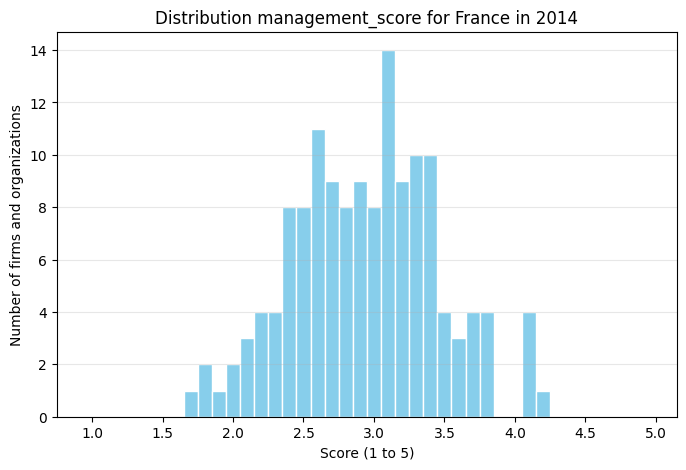

In [25]:
# Configuration of the histogram
bins_precision = np.arange(1, 5.1, 0.1)
plt.figure(figsize=(8, 5))
plt.hist(df1['management'], bins=bins_precision, edgecolor='white', color='skyblue', align='left')

# Personnalisation of the axes and title
plt.title('Distribution management_score for France in 2014')
plt.xlabel('Score (1 to 5)')
plt.ylabel('Number of firms and organizations')
plt.xticks(np.arange(1,5.5,0.5)) # ticks every 0.5
plt.grid(axis='y', alpha=0.3)

# Show the plot
plt.show()

As we can see from this histogram, we think that a theorical normal distribution can fit with this data observed